# Efficient Frontier #

In [36]:
import pandas as pd
import risk_kit as rk
import numpy as np
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
ind = rk.get_ind_returns()

In [3]:
ind.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


<AxesSubplot:>

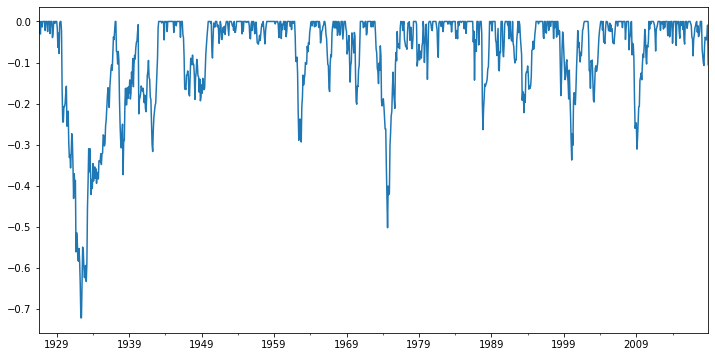

In [4]:
rk.drawdown(ind["Food"])["Drawdown"].plot(figsize=(12,6))

In [5]:
cols_interest = ["Food","Smoke","Coal","Beer","Fin"]
rk.var_gaussian(ind[cols_interest], modified=True)

Food     0.061207
Smoke    0.080292
Coal     0.047359
Beer     0.033881
Fin      0.075199
dtype: float64

In [6]:
rk.var_gaussian(ind, modified=True).sort_values().tail()

Carry    0.094527
Meals    0.098403
BusEq    0.099377
Games    0.100701
Mines    0.102782
dtype: float64

In [7]:
rk.var_gaussian(ind, modified=True).sort_values().head()

Beer     0.033881
Coal     0.047359
Food     0.061207
Telcm    0.064719
Hshld    0.064886
dtype: float64

<AxesSubplot:title={'center':'Cornish-Fisher VaR'}>

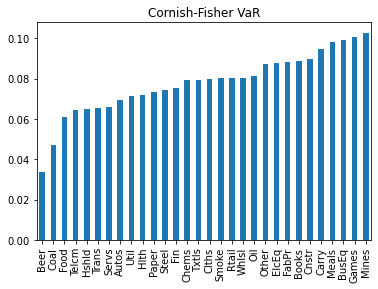

In [8]:
rk.var_gaussian(ind, modified=True).sort_values().plot.bar(title="Cornish-Fisher VaR")

<AxesSubplot:title={'center':'Industry Sharpe Ratios 1926-2018'}>

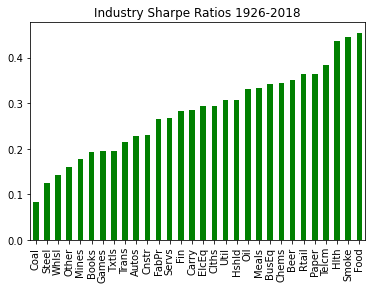

In [9]:
rk.sharpe_ratio(ind, 0.03, 12).sort_values().plot.bar(title="Industry Sharpe Ratios 1926-2018", color="green")

<AxesSubplot:title={'center':'Industry Sharpe Ratios 2000-2018'}>

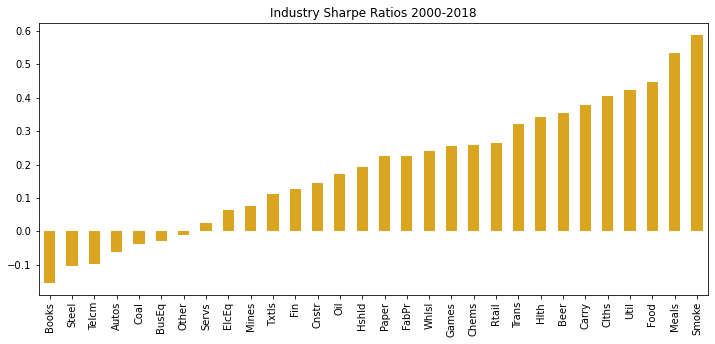

In [10]:
rk.sharpe_ratio(ind["2000":], 0.03, 12).sort_values().plot.bar(title="Industry Sharpe Ratios 2000-2018", figsize=(12,5), color="goldenrod")

In [11]:
er = rk.annualize_rets(ind["1996":"2000"], 12)

<AxesSubplot:>

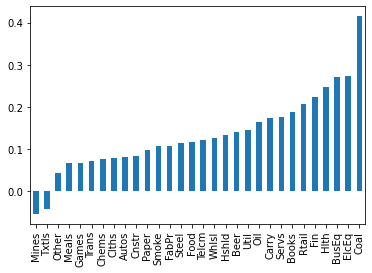

In [12]:
er.sort_values().plot.bar()

In [13]:
cov = ind["1996":"2000"].cov()

In [14]:
cov.shape

(30, 30)

# Efficient Frontier Graph #

In [19]:
assets = ["Food", "Beer", "Smoke", "Coal"]
er[assets]

Food     0.116799
Beer     0.141126
Smoke    0.107830
Coal     0.414689
dtype: float64

In [20]:
cov.loc[assets, assets]

,Food,Beer,Smoke,Coal
Food,0.002609,0.002379,0.002061,0.000027
Beer,0.002379,0.005264,0.001359,0.001728
Smoke,0.002061,0.001359,0.008349,-0.000733
Coal,0.000027,0.001728,-0.000733,0.018641


In [23]:
weights = np.repeat(1/4, 4)

In [24]:
weights

array([0.25, 0.25, 0.25, 0.25])

In [25]:
rk.portfolio_return(weights,er[assets])

0.19511097196038385

In [26]:
rk.portfolio_vol(weights, cov.loc[assets, assets])

0.055059195776437045

## 2 Asset Frontier ##

In [27]:
l = ["Games", "Fin"]

In [28]:
n_points = 20
weights = [np.array([w, 1-w]) for w in np.linspace(0, 1, n_points)]

In [29]:
weights

[array([0., 1.]),
 array([0.05263158, 0.94736842]),
 array([0.10526316, 0.89473684]),
 array([0.15789474, 0.84210526]),
 array([0.21052632, 0.78947368]),
 array([0.26315789, 0.73684211]),
 array([0.31578947, 0.68421053]),
 array([0.36842105, 0.63157895]),
 array([0.42105263, 0.57894737]),
 array([0.47368421, 0.52631579]),
 array([0.52631579, 0.47368421]),
 array([0.57894737, 0.42105263]),
 array([0.63157895, 0.36842105]),
 array([0.68421053, 0.31578947]),
 array([0.73684211, 0.26315789]),
 array([0.78947368, 0.21052632]),
 array([0.84210526, 0.15789474]),
 array([0.89473684, 0.10526316]),
 array([0.94736842, 0.05263158]),
 array([1., 0.])]

In [30]:
len(weights)

20

<AxesSubplot:xlabel='Vol', ylabel='R'>

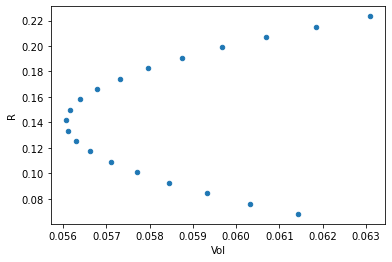

In [31]:
rets = [rk.portfolio_return(w, er[l]) for w in weights]
vols = [rk.portfolio_vol(w, cov.loc[l, l]) for w in weights]
ef = pd.DataFrame({"R": rets, "Vol": vols})
ef.plot.scatter(x="Vol", y="R")

<AxesSubplot:xlabel='Volatility'>

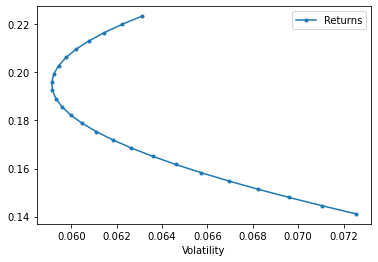

In [38]:
m = ["Fin","Beer"]
rk.plot_ef2(25, er[m], cov.loc[m, m])